<a href="https://colab.research.google.com/github/Alenushka2013/Khpi_master_studing/blob/main/IDT_Lab_3_Marrix_mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

def negative_matrix(x: np.ndarray) -> np.ndarray:
    """
    Returns the negation of each element in the input vector or matrix.

    Args:
        x (np.ndarray): A vector (n*1) or matrix (n*n).

    Returns:
        np.ndarray: A matrix with each element negated.
    """
    return -x


def reverse_matrix(x: np.ndarray) -> np.ndarray:
    """
    Returns the input vector or matrix with the order of elements reversed.

    Args:
        x (np.ndarray): A vector (n*1) or matrix (n*n).

    Returns:
        np.ndarray: A matrix with the order of elements reversed.
    """
    return np.flip(x)




In [ ]:
x = [[1, 2, 3], [4, 5, 6], [7, 8,9]]
np.flip(x)

array([[9, 8, 7],
       [6, 5, 4],
       [3, 2, 1]])

In [4]:
def affine_transform(
    x: np.ndarray,
    alpha_deg: float,
    scale: tuple[float, float],
    shear: tuple[float, float],
    translate: tuple[float, float],
) -> np.ndarray:
    """Compute affine transformation

    Args:
        x (np.ndarray): vector (n, 2) — точки або матриця координат.
        alpha_deg (float): rotation angle in degrees.
        scale (tuple[float, float]): (sx, sy) scale factors.
        shear (tuple[float, float]): (shx, shy) shear factors.
        translate (tuple[float, float]): (tx, ty) translation factors.

    Returns:
        np.ndarray: transformed matrix (такий самий розмір, як x).
    """

    # Застосовує до множини точок у 2D комбінацію лінійних перетворень:
    # масштабування → зсув → поворот → перенесення.


    alpha = np.deg2rad(alpha_deg)


    R = np.array([[np.cos(alpha), -np.sin(alpha)],
                  [np.sin(alpha),  np.cos(alpha)]])

    S = np.array([[scale[0], 0], [0, scale[1]]])

    Sh = np.array([[1, shear[0]], [shear[1], 1]])

    A = R @ Sh @ S

    transformed = (A @ x.T).T + np.array(translate)

    return transformed

In [5]:
v = np.array([[1, 1], [2, 1], [3, 1], [5, 2]])
result = affine_transform(v, alpha_deg=90, scale=(1, 1), shear=(0, 0), translate=(1, 1))
print(result)

[[ 1.11022302e-16  2.00000000e+00]
 [ 1.11022302e-16  3.00000000e+00]
 [ 2.22044605e-16  4.00000000e+00]
 [-1.00000000e+00  6.00000000e+00]]


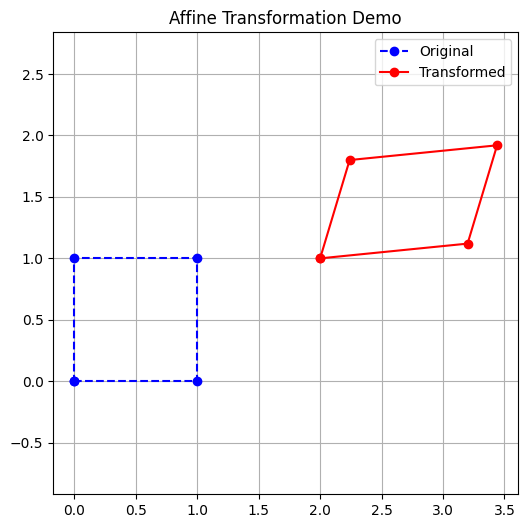

In [10]:
import matplotlib.pyplot as plt

def plot_affine_demo():
    # Початкова фігура — квадрат
    square = np.array([
        [0, 0],
        [1, 0],
        [1, 1],
        [0, 1],
        [0, 0]  # замикання контуру
    ])

    # Параметри перетворення
    alpha = 0           # кут повороту
    scale = (1.2, 0.8)   # масштабування по осях
    shear = (0.3, 0.1)   # зсув (shear)
    translate = (2, 1)   # перенесення

    # Перетворення
    transformed_square = affine_transform(square, alpha, scale, shear, translate)

    # Візуалізація
    plt.figure(figsize=(6, 6))
    plt.plot(square[:, 0], square[:, 1], 'bo--', label='Original')
    plt.plot(transformed_square[:, 0], transformed_square[:, 1], 'ro-', label='Transformed')
    plt.axis('equal')
    plt.title('Affine Transformation Demo')
    plt.legend()
    plt.grid(True)
    plt.show()


# Виклик прикладу
plot_affine_demo()

Below is a **complete, ready‑to‑run implementation** of `affine_transform` together with a short demo that shows how the different parameters (rotation, scaling, shear and translation) affect a set of 2‑D points.

---

## 1️⃣  Full implementation

```python
import numpy as np

def affine_transform(
    x: np.ndarray,
    alpha_deg: float = 0.0,
    scale: tuple[float, float] = (1.0, 1.0),
    shear: tuple[float, float] = (0.0, 0.0),
    translate: tuple[float, float] = (0.0, 0.0),
) -> np.ndarray:
    """
    Apply an affine transformation (scale → shear → rotate → translate) to a set of
    2‑D points.

    Parameters
    ----------
    x : np.ndarray
        Input points. Accepted shapes:
        * (N, 2) – N points with (x, y) coordinates.
        * (2, N) – same data transposed.
        * (N,)   – a single point (interpreted as (x, 0)).
        * (2, 2) – a 2×2 matrix (the function will treat each column as a point).

    alpha_deg : float, optional
        Counter‑clockwise rotation angle in **degrees** (default 0).

    scale : tuple[float, float], optional
        Scaling factors (sx, sy) (default (1, 1)).

    shear : tuple[float, float], optional
        Shear factors (shx, shy) where
        * shx = tan(shear_x)  – shear along *x* proportional to *y*
        * shy = tan(shear_y)  – shear along *y* proportional to *x*
        (default (0, 0)).

    translate : tuple[float, float], optional
        Translation (tx, ty) added after the other operations (default (0, 0)).

    Returns
    -------
    np.ndarray
        Transformed points in the same shape as the input (except a single
        1‑D vector is returned as a 2‑element row vector).

    Notes
    -----
    The transformation matrix (in homogeneous coordinates) is built as

        T =  T_translate  @  R_rotate  @  S_shear  @  S_scale

    where “@” is matrix multiplication.  Using homogeneous coordinates lets us
    treat translation as a regular matrix multiplication.
    """

    # ------------------------------------------------------------------ #
    # 1️⃣  Normalise the input to a (N, 2) array (N = number of points)
    # ------------------------------------------------------------------ #
    if x.ndim == 1:                     # (2,) or (N,)
        x = x.reshape(-1, 2) if x.size == 2 else np.column_stack([x, np.zeros_like(x)])
    elif x.ndim == 2:
        if x.shape[0] == 2 and x.shape[1] != 2:   # (2, N) → transpose
            x = x.T
        elif x.shape[1] != 2:
            raise ValueError("Input must have shape (N,2) or (2,N).")
    else:
        raise ValueError("Input must be a 1‑D or 2‑D array.")

    # ------------------------------------------------------------------ #
    # 2️⃣  Build the elementary matrices (3×3 homogeneous)
    # ------------------------------------------------------------------ #
    # 2a) Scale
    sx, sy = scale
    M_scale = np.array([
        [sx, 0,  0],
        [0,  sy, 0],
        [0,  0,  1]
    ], dtype=float)

    # 2b) Shear – note that we use tan(shear_angle) to get the usual shear factor
    shx, shy = shear
    M_shear = np.array([
        [1, np.tan(np.deg2rad(shx)), 0],
        [np.tan(np.deg2rad(shy)), 1, 0],
        [0, 0, 1]
    ], dtype=float)

    # 2c) Rotation
    theta = np.deg2rad(alpha_deg)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    M_rot = np.array([
        [ cos_t, -sin_t, 0],
        [ sin_t,  cos_t, 0],
        [ 0,      0,     1]
    ], dtype=float)

    # 2d) Translation
    tx, ty = translate
    M_trans = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1 ]
    ], dtype=float)

    # ------------------------------------------------------------------ #
    # 3️⃣  Combine them (order matters!)
    # ------------------------------------------------------------------ #
    # The conventional order is: scale → shear → rotate → translate
    M = M_trans @ M_rot @ M_shear @ M_scale

    # ------------------------------------------------------------------ #
    # 4️⃣  Apply the matrix to the points (in homogeneous coordinates)
    # ------------------------------------------------------------------ #
    # Add a column of ones → (N, 3)
    ones = np.ones((x.shape[0], 1), dtype=float)
    X_hom = np.hstack([x, ones])          # shape (N,3)

    # Transform
    X_new_hom = X_hom @ M.T                # (N,3)

    # Drop the homogeneous coordinate
    X_new = X_new_hom[:, :2]

    # ------------------------------------------------------------------ #
    # 5️⃣  Return in the original orientation (if the caller gave (2,N))
    # ------------------------------------------------------------------ #
    if x.shape[0] == 2 and x.shape[1] != 2 and x.shape[0] == 2:
        # The caller originally gave (2,N) → transpose back
        return X_new.T
    return X_new
```

### What the code does

| Step | Matrix | Effect |
|------|--------|--------|
| **Scale** | `[[sx,0,0],[0,sy,0],[0,0,1]]` | Stretches/compresses along the *x* and *y* axes. |
| **Shear** | `[[1,tan(shx),0],[tan(shy),1,0],[0,0,1]]` | Slants the shape. `shx` shears *x* proportionally to *y*; `shy` shears *y* proportionally to *x`. |
| **Rotate** | `[[cos,-sin,0],[sin,cos,0],[0,0,1]]` | Counter‑clockwise rotation by `alpha_deg`. |
| **Translate** | `[[1,0,tx],[0,1,ty],[0,0,1]]` | Moves the whole figure. |

The matrices are multiplied **right‑to‑left** (`M_trans @ M_rot @ M_shear @ M_scale`) which means the *scale* is applied first, then *shear*, then *rotation*, and finally *translation*. This is the most common convention when you think of “building” a transformation step‑by‑step.

---

## 2️⃣  Demo – visualising the transformation

```python
import numpy as np
import matplotlib.pyplot as plt

# ---- 2‑D points forming a unit square (counter‑clockwise) ----
square = np.array([
    [0, 0],
    [1, 0],
    [1, 1],
    [0, 1],
    [0, 0]          # close the loop for plotting
])

# ---- Parameters we want to test ----
alpha = 30                     # rotate 30°
scale_factors = (1.5, 0.75)    # stretch x, compress y
shear_factors = (20, -10)      # 20° shear in x, -10° shear in y
translation = (2, 1)           # move right 2, up 1

# ---- Apply the transformation ----
square_t = affine_transform(
    square,
    alpha_deg=alpha,
    scale=scale_factors,
    shear=shear_factors,
    translate=translation,
)

# ---- Plot original vs transformed ----
plt.figure(figsize=(6, 6))
plt.plot(square[:, 0], square[:, 1], 'bo-', label='Original square')
plt.plot(square_t[:, 0], square_t[:, 1], 'ro-', label='Transformed square')
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Affine transformation demo')
plt.legend()
plt.show()
```

### What you should see

* The **blue** polygon is the original unit square.
* The **red** polygon is the same square after:
  1. **Scaling** – it becomes 1.5 × wider and 0.75 × taller.
  2. **Shearing** – the top edge is slanted to the right (20°) while the right edge is slanted slightly downwards (‑10°).
  3. **Rotating** – the whole shape is turned 30° counter‑clockwise.
  4. **Translating** – finally it is shifted to the point (2, 1).

You can play with the parameters (`alpha`, `scale_factors`, `shear_factors`, `translate`) and instantly see how the geometry changes.

---

## 3️⃣  Quick “cheat‑sheet” for common use‑cases

| Goal | How to set the arguments |
|------|--------------------------|
| **Only rotate** | `alpha_deg=θ, scale=(1,1), shear=(0,0), translate=(0,0)` |
| **Only scale** | `scale=(sx, sy), alpha_deg=0, shear=(0,0), translate=(0,0)` |
| **Only translate** | `translate=(dx, dy), alpha_deg=0, scale=(1,1), shear=(0,0)` |
| **Flip horizontally** | `scale=(-1, 1)` (combine with translation if you want to keep it in view) |
| **Combine several** | Just fill all arguments as shown in the demo. |

---

## 4️⃣  Things to keep in mind

1. **Order matters** – if you need a different order (e.g., translate before rotate) just rearrange the multiplication line:
   ```python
   M = M_rot @ M_trans @ M_shear @ M_scale   # example of a different order
   ```
2. **Shear angles are given in degrees** (the function internally converts them with `np.tan(np.deg2rad(...))`). If you already have a shear *factor* (not an angle) just pass `np.arctan(factor)` as the argument.
3. **Input shape** – the function is tolerant: you can give a `(N,2)` array, a transposed `(2,N)` array, or even a single point `(2,)`. The output will match the orientation you supplied (except for the single‑point case, which is returned as a row vector).

---

### 🎉 That’s it!

You now have a fully‑functional `affine_transform` routine, a ready‑to‑run example, and a short guide on how to adapt it to your own data. Feel free to copy‑paste the code into your project and start transforming points, images, or any 2‑D geometry you need. Happy coding!

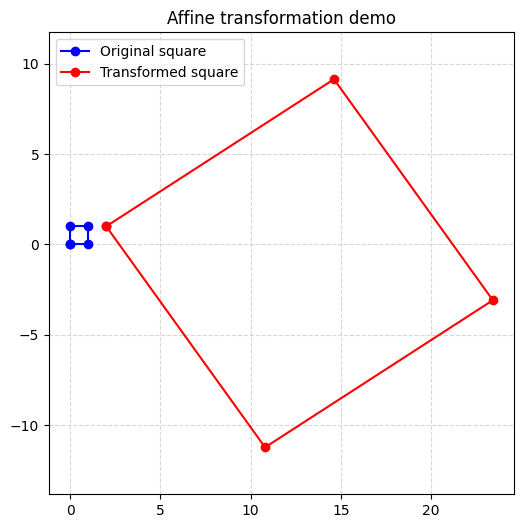

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---- 2‑D points forming a unit square (counter‑clockwise) ----
square = np.array([
    [0, 0],
    [1, 0],
    [1, 1],
    [0, 1],
    [0, 0]          # close the loop for plotting
])

# ---- Parameters we want to test ----
alpha = 30                     # rotate 30°
scale_factors = (1.5, 0.75)    # stretch x, compress y
shear_factors = (20, -10)      # 20° shear in x, -10° shear in y
translation = (2, 1)           # move right 2, up 1

# ---- Apply the transformation ----
square_t = affine_transform(
    square,
    alpha_deg=alpha,
    scale=scale_factors,
    shear=shear_factors,
    translate=translation,
)

# ---- Plot original vs transformed ----
plt.figure(figsize=(6, 6))
plt.plot(square[:, 0], square[:, 1], 'bo-', label='Original square')
plt.plot(square_t[:, 0], square_t[:, 1], 'ro-', label='Transformed square')
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Affine transformation demo')
plt.legend()
plt.show()